In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import os
os.getcwd()  

'/home/jgonzalez/Github/segmentation_mapping'

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import glob 
from rasterio.plot import show #graficar el mapa
import rasterio
from pathlib import Path
import cv2

# Imagen tif

/home/jgonzalez/anaconda3/envs/pytorch/lib/python3.6/site-packages/rasterio/__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


(3, 4000, 6000)
(4000, 6000, 3) 255
image (4000, 6000, 3) 1.0


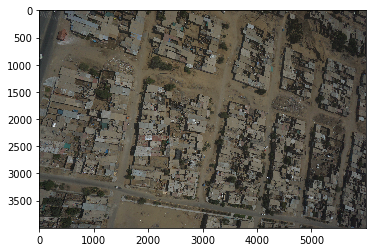

In [4]:
# 


input_filename = '/home/jrengifo/dataset_groundtruth/0.JPG'
#image
import rasterio
image1 = rasterio.open(input_filename)
print(image1.read().shape)

arrayRGB=(image1.read().transpose(1,2,0))
print(arrayRGB.shape,arrayRGB.max())

arrayRGB=(arrayRGB[:,:,:3]/arrayRGB.max())
print('image', arrayRGB.shape,arrayRGB.max()) # Ch,Hy,Wx tensor
plt.imshow(arrayRGB)
plt.show()

(3, 4000, 6000)
mask (4000, 6000, 3) 255 0


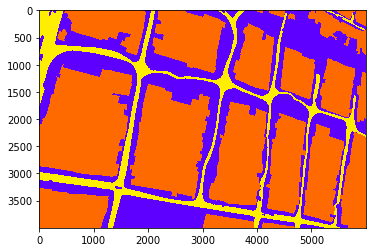

In [5]:
#mask
mask_filename='/home/jrengifo/dataset_groundtruth/0.tif'
mask1 = rasterio.open(mask_filename)
print(mask1.read().shape)

mask1.indexes
arraymask1=(mask1.read()).transpose(1,2,0)
arraymask1=(arraymask1).astype(np.uint8)  #importante uint8
print('mask', arraymask1.shape,np.max(arraymask1),np.min(arraymask1)) # Ch,Hy,Wx tensor
plt.imshow(arraymask1)


images founded: (47,)
images founded: (47,)
0 /home/jrengifo/dataset_groundtruth/0.JPG
0 /home/jrengifo/dataset_groundtruth/0.tif
(3, 4000, 6000)
(4000, 6000, 3) 255
image (4000, 6000, 3) 1.0
mask (4000, 6000, 3) 255 0


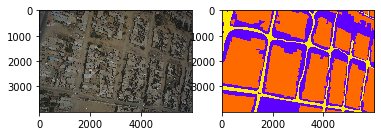

1 /home/jrengifo/dataset_groundtruth/1.JPG
1 /home/jrengifo/dataset_groundtruth/1.tif
(3, 4000, 6000)
(4000, 6000, 3) 213
image (4000, 6000, 3) 1.0
mask (4000, 6000, 3) 255 0


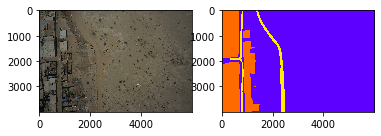

2 /home/jrengifo/dataset_groundtruth/10.JPG
2 /home/jrengifo/dataset_groundtruth/10.tif
(3, 4000, 6000)
(4000, 6000, 3) 255
image (4000, 6000, 3) 1.0
mask (4000, 6000, 3) 255 0


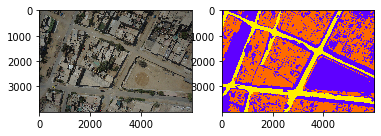

3 /home/jrengifo/dataset_groundtruth/11.JPG
3 /home/jrengifo/dataset_groundtruth/11.tif
(3, 4000, 6000)
(4000, 6000, 3) 255
image (4000, 6000, 3) 1.0
mask (4000, 6000, 3) 255 0


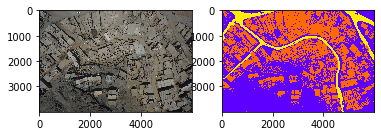

In [6]:

get_files_path = '/home/jrengifo/dataset_groundtruth/*.JPG'
dataset_images = np.array(sorted(glob.glob(get_files_path)))
print('images founded:', dataset_images.shape)
    
print('images founded:', dataset_images.shape)
for i, input_path in enumerate(dataset_images[:4]):
     
    print(i,input_path)

    
    mask_path =input_path.replace('JPG','tif')
    print(i,mask_path)        
    index_imgs=i
   ############ imagen #######################
    image1 = rasterio.open(input_path)
    print(image1.read().shape)
    arrayRGB=(image1.read().transpose(1,2,0))
    print(arrayRGB.shape,arrayRGB.max())

    arrayRGB=(arrayRGB[:,:,:3]/arrayRGB.max())
    print('image', arrayRGB.shape,arrayRGB.max()) # Ch,Hy,Wx tensor
    plt.subplot(1,2,1)
    plt.imshow(arrayRGB)

    ############ masks #########################
    mask1 = rasterio.open(mask_path)
    mask1.indexes
    arraymask1=(mask1.read()).transpose(1,2,0)
    arraymask1=(arraymask1[:,:,:]).astype(np.uint8)  #importante uint8
    print('mask', arraymask1.shape,np.max(arraymask1),np.min(arraymask1)) # Ch,Hy,Wx tensor

    plt.subplot(1,2,2)
    plt.imshow(arraymask1)
    plt.show()



# Crop images and masks

In [7]:
!python create_dataset.py --dataset-path '/home/jrengifo/dataset_groundtruth' --dataset-file 'dataset/data_512'

Cortando pathes----------------
out_path_images dataset/data_512/images
images founded: (47,)
0 /home/jrengifo/dataset_groundtruth/0.JPG
0 /home/jrengifo/dataset_groundtruth/0.tif
/home/jgonzalez/anaconda3/envs/pytorch/lib/python3.6/site-packages/rasterio/__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/home/jgonzalez/anaconda3/envs/pytorch/lib/python3.6/site-packages/rasterio/__init__.py:226: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  **kwargs)
Images-elapsed time: 1.7480393927544355
Masks-elapsed time: 0.34667216707021
black images >15% (0,)
1 /home/jrengifo/dataset_groundtruth/1.JPG
1 /home/jrengifo/dataset_groundtruth/1.tif
Images-elapsed time: 1.694963757880032
Masks-elapsed 

# Crop images and masks inclination

In [10]:
!python create_dataset.py --dataset-path '/home/jrengifo/dataset_groundtruth/inclination' --dataset-file 'dataset/test_inclination'

Cortando pathes----------------
out_path_images dataset/test_inclination/images
images founded: (2,)
0 /home/jrengifo/dataset_groundtruth/inclination/47.JPG
0 /home/jrengifo/dataset_groundtruth/inclination/47.tif
/home/jgonzalez/anaconda3/envs/pytorch/lib/python3.6/site-packages/rasterio/__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/home/jgonzalez/anaconda3/envs/pytorch/lib/python3.6/site-packages/rasterio/__init__.py:226: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  **kwargs)
Images-elapsed time: 1.8314422387629747
Masks-elapsed time: 0.4597426112741232
black images >15% (0,)
1 /home/jrengifo/dataset_groundtruth/inclination/48.JPG
1 /home/jrengifo/dataset_groundtruth/inclination

#check elimination of whites and blacks 

# Creation of  train and val set

In [8]:
from get_train_test_1 import split_train_test
# change the data path here
data_HR_path= Path('dataset') 
images_path=str('dataset/data_512/images')

#Names to the files
train_val_file='train_val_512'
test_file='test_512'
percent_test=0.10 #10%

split_train_test(original_dataset_dir= images_path, 
                 base_dir = str(data_HR_path),
                 test_split = percent_test, 
                 train_file=train_val_file,
                 test_file=test_file)

3619 3258 361
dataset/train_val_512/images
dataset/test_512/images


In [ ]:
3773 3396 377
dataset/train_val_512/images
dataset/test_512/images
num train = 2988, num_val = 747, num_test=716

# Plot  images + mask

In [98]:
def mask_overlay(image, mask, color=(15, 15, 0)):
    """
    Helper function to visualize mask over the img
    """
    print(mask.shape)      
    mask = np.dstack((mask, mask, mask)) * np.array(color)
    mask = mask.astype(np.float32)
    weighted_sum = cv2.addWeighted(mask, 0.3, image, 0.7, 0.)
    img = image.copy()
    ind = mask[:, :, 0] > 0  
    img[ind] = weighted_sum[ind]

    return img

def plot_img_mask(img_path):
    img = np.load(str(img_path)).transpose(1,2,0)

    print(np.shape(img),np.min(img),np.max(img))

    img2 = (img[:,:,:3].astype(np.float32))/np.max(img)
    #inp = (img*255).astype(np.uint8)
    mask = np.load(str(img_path).replace('images', 'masks').replace(r'.npy', r'_a.npy'), 0).transpose(1,2,0)
    
    #mask=mask.reshape(mask.shape[1],-1)
    mask = (mask[:,:,1]> 0).astype(np.uint8)  #np .max(mask, axis=2)  #convert of 3 channel to 1 channel
    #mask=(mask > 0).astype(np.uint8)
    #mask=(mask > 0).astype(np.float32)
    
    
    fig = plt.figure(figsize=(30, 30))  
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    ax1=plt.subplot(131)
    ax1.imshow(img2)
    ax2=plt.subplot(132)
    ax2.imshow(mask)

    ax3=plt.subplot(133)
    ax3.imshow(mask_overlay(img2, mask))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3) 4 233
(512, 512)


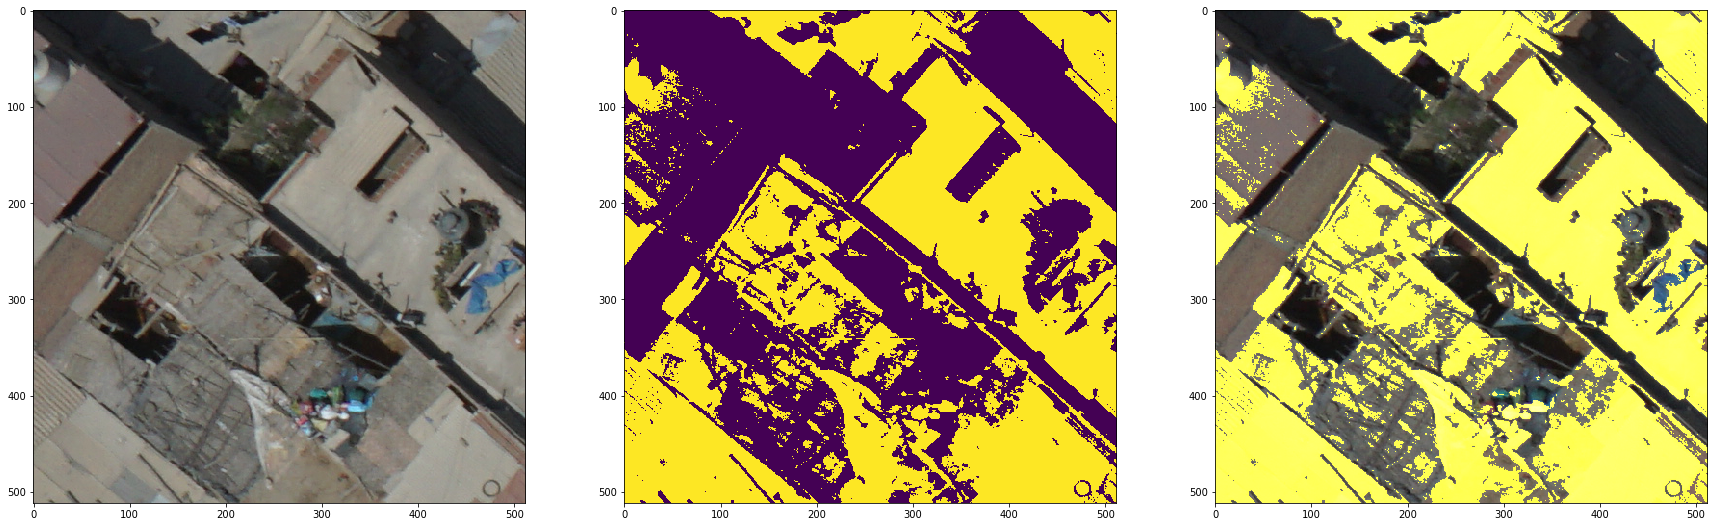

In [92]:
img_path ="dataset/data_512/images/3_512-1024.npy"
plot_img_mask(img_path)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3) 3 183
(512, 512)


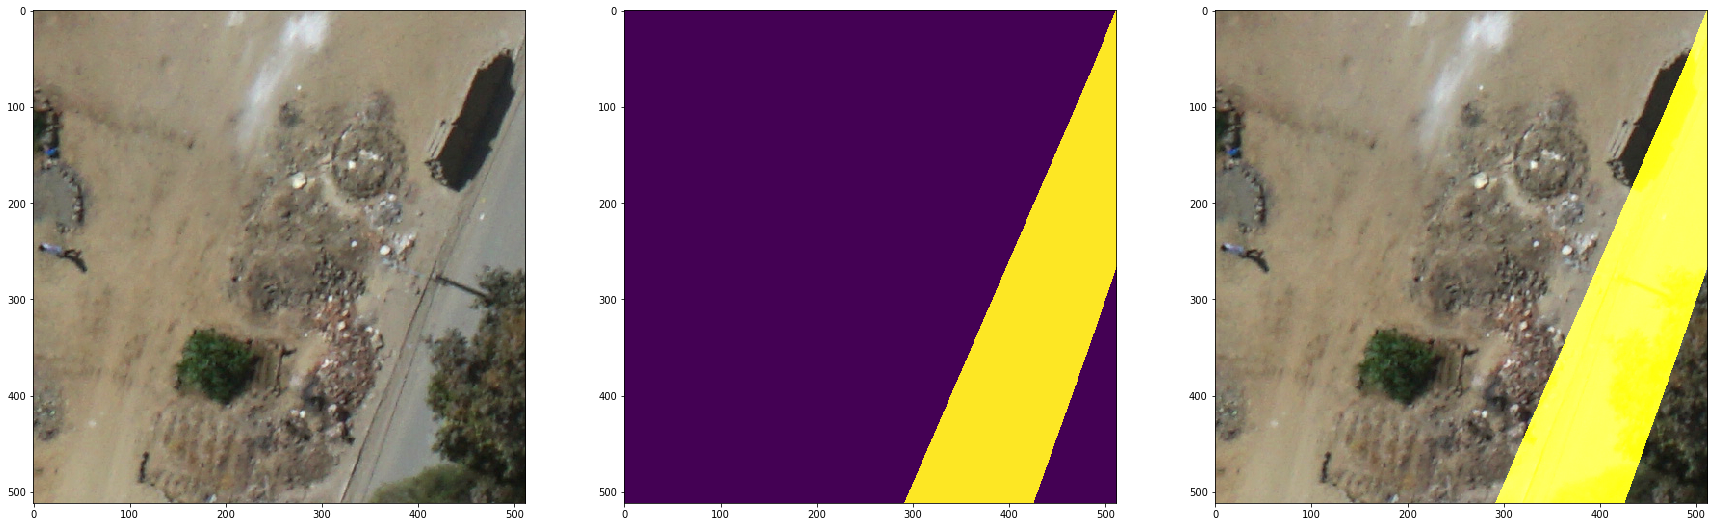

In [93]:
img_path ="dataset/data_512/images/2_512-1024.npy"
plot_img_mask(img_path)


# train

In [ ]:
# falta create files of outpout automaticaly

In [9]:
!python train.py   --model UNet11  --n-epochs 1 --lr 1e-5 --batch-size 4 

cuda:1
CUDA is available!  Training on GPU ...
channels: [0, 1, 2] len 3
device model [1]
512 _100_percent_512
data_path: dataset
num train = 2606, num_val = 652, num_test=361
Train: dataset/data_512 2606 min  0 max  255
Val: dataset/data_512 652 min  0 max  255
Test: dataset/data_512 361 -min  0 max  255
All: dataset/data_512 3619 min  0 max  255
3
elapsed time: 15.370903742033988
Train mean:[0.30974781 0.29842296 0.26237753]
std:[0.12725424 0.11870143 0.10569313]
Val mean:[0.30711203 0.29661946 0.26159184]
std:[0.12672154 0.11838959 0.10557144]
Test mean:[0.30617909 0.29535891 0.2612972 ]
std:[0.12554421 0.11848878 0.1063497 ]
All mean:[0.30891696 0.2977924  0.26212822]
std:[0.12699597 0.11862885 0.10573769]
255 [0.30974781 0.29842296 0.26237753] [0.12725424 0.11870143 0.10569313]
Epoch 0/0
----------
LR 1e-05
dataloader: 652
train: bce: 0.349180, loss: 0.638064, dice_loss: 0.926948, jaccard_loss: 0.958203
dataloader: 163
val: bce: 0.259096, loss: 0.592151, dice_loss: 0.925206, jacca

# after 40 epochs
train_512
Dice =  0.6961809013865128 0.3960863484358428
Jaccard =  0.654702022225694 0.4047315882253218

val_512
Dice =  0.6894904085280705 0.39432766393906227
Jaccard =  0.6450581755374838 0.40255440673693965

test_512
Dice =  0.7075762481240354 0.39587246860830577
Jaccard =  0.6691260184277458 0.4043638570353704


In [289]:
!python plotting.py --out-file '512' --stage 'test' --name-file '_100_percent_512' --name-model 'UNet11' --count 361 --n-epochs  40

Figure(640x480)
(430, 1, 5, 512, 512) (430, 1, 1, 512, 512) (430, 1, 1, 512, 512)


## Predictions images with inclination

In [25]:
import glob  ###
import os
from scalarmeanstd import meanstd
from models import UNet11,UNet
import torch
from metrics_prediction_2 import find_metrics


data_path= Path('dataset') 
data_all='data_512'
channels=3

train_file_names= np.load('logs/mapping/512/train_files_100_percent_512_UNet_fold0_0.npy')
val_file_names=np.load('logs/mapping/512/val_files_100_percent_512_UNet_fold0_0.npy')
test_file_names=np.array(sorted(glob.glob(str(data_path/'test_inclination'/'images')+ "/*.npy")))


print(train_file_names.shape,val_file_names.shape,test_file_names.shape)
max_values, mean_values, std_values=meanstd(train_file_names, val_file_names,test_file_names,str(data_path/data_all),channels) #_60 
print(max_values, mean_values, std_values)


num_classes = 1 
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
model = UNet11(num_classes=num_classes, input_channels=channels)
model.load_state_dict(torch.load('logs/mapping/512/model_100_percent_512_UNet11_foldout0_foldin0_40epochs'))
model.to(device)
#change unet 11 and epochs 40 model and find metrics

find_metrics(train_file_names,val_file_names, test_file_names, channels,max_values, mean_values, std_values,model,fold_out='0', fold_in='0',  name_model='UNet11', epochs='40',out_file='512',dataset_file='512' ,name_file='images_inclination' )  

#plot_prediction(path_model=model,unlabel_name_file=file_unlabel)

(2606,) (652,) (154,)
Train: dataset/data_512 2606 min  0 max  255
Val: dataset/data_512 652 min  0 max  255
Test: dataset/data_512 154 -min  0 max  255
All: dataset/data_512 3619 min  0 max  255
3
elapsed time: 16.048845399636775
Train mean:[0.30974781 0.29842296 0.26237753]
std:[0.12725424 0.11870143 0.10569313]
Val mean:[0.30711203 0.29661946 0.26159184]
std:[0.12672154 0.11838959 0.10557144]
Test mean:[0.30232088 0.289421   0.25907387]
std:[0.15976512 0.15323897 0.13820462]
All mean:[0.30891696 0.2977924  0.26212822]
std:[0.12699597 0.11862885 0.10573769]
255 [0.30974781 0.29842296 0.26237753] [0.12725424 0.11870143 0.10569313]
154
train_512
Dice =  0.6961809013865128 0.39608634843584284
Jaccard =  0.654702022225694 0.4047315882253218 

val_512
Dice =  0.6894904085280705 0.39432766393906227
Jaccard =  0.6450581755374838 0.40255440673693965 

test_512
Dice =  0.569038110506999 0.42732662889947076
Jaccard =  0.5232999932456326 0.4264995890507128 



(154, 1, 3, 512, 512) (154, 1, 1, 512, 512) (154, 1, 1, 512, 512)


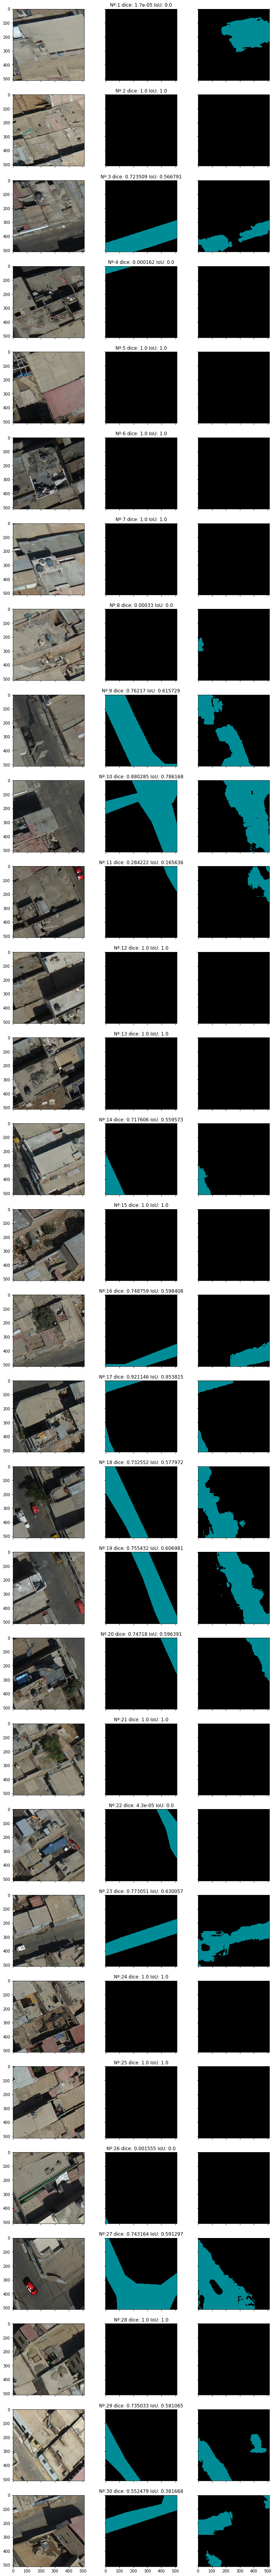

In [27]:
from plotting import plot_prediction
plot_prediction(stage='test',name_file='images_inclination',out_file='512',name_model='UNet11',fold_out=0,fold_in=0,epochs=40, count=154)

In [ ]:
154 10% 20%


## Predictions unlabel images

In [ ]:
##
from unlabeled_plotting import plot_prediction
path_model=''
file_unlabel=''
plot_prediction(path_model=path_model,unlabel_name_file=file_unlabel)